In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/11_Nov.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,20.000000,81.000000,1,4,1,1943.0,1963.0,2051.0,1852.0,1803.0,1981.0,1951.416667,1867.0
1,19.916667,81.000000,1,4,1,1889.0,1975.0,2036.0,1828.0,1781.0,1976.0,1933.750000,1824.0
2,19.833333,81.000000,1,4,1,1901.0,1990.0,2012.0,1764.0,1755.0,1935.0,1916.750000,1808.0
3,19.750000,81.000000,1,4,1,1887.0,1977.0,1977.0,1802.0,1760.0,1941.0,1902.416667,1805.0
4,19.666667,81.000000,2,4,1,1867.0,1943.0,1963.0,1788.0,1740.0,1913.0,1888.916667,1801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,13.432452,78.354324,23,7,0,1672.0,1762.0,1868.0,1657.0,1676.0,1644.0,1709.083333,1600.0
8636,13.432452,78.354324,24,7,0,1634.0,1746.0,1826.0,1630.0,1645.0,1619.0,1687.833333,1571.0
8637,13.432452,78.354324,24,7,0,1643.0,1722.0,1801.0,1613.0,1620.0,1603.0,1666.500000,1545.0
8638,13.100000,78.354324,24,7,0,1608.0,1699.0,1796.0,1598.0,1594.0,1583.0,1645.916667,1549.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700


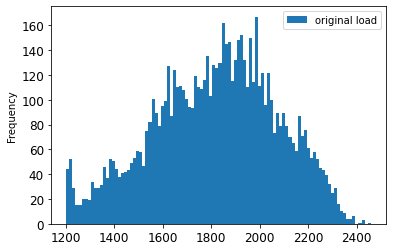

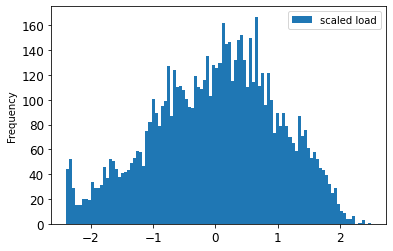

In [8]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

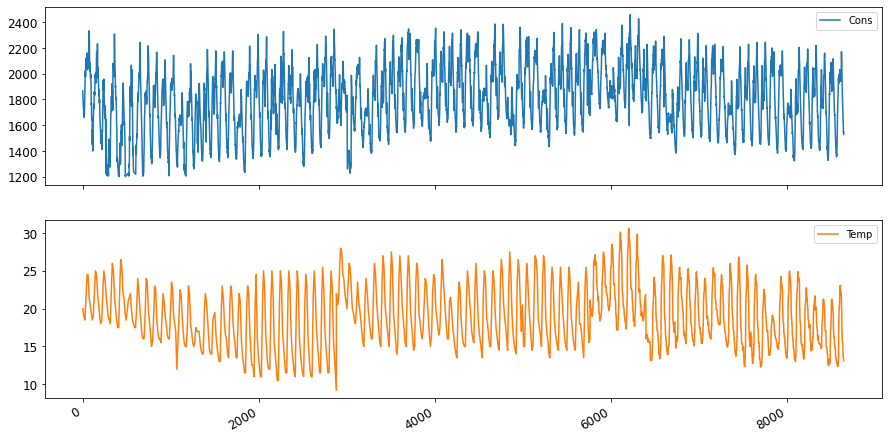

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020,-0.605322
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132,-0.620887
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957,-0.694818
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633,-0.601431
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700,-0.636451
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,-0.441585,0.205707,0.219186,-0.683145
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,-0.426361,0.152739,0.140516,-0.667580
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,-0.502479,0.073287,0.061508,-0.725947
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,-0.551955,0.039236,-0.011397,-1.080039
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,-0.601431,-0.021298,-0.071417,-1.430241


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.192358,0.176626,0.786924,-1.660891,-0.04092,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020,-0.605322
1,0.025040,0.155615,0.786924,-1.660891,-0.04092,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132,-0.620887
2,-0.037218,0.134603,0.786924,-1.660891,-0.04092,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957,-0.694818
3,-0.048891,0.113592,0.786924,-1.660891,-0.04092,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633,-0.601431
4,-0.064456,0.092580,0.786924,-1.516446,-0.04092,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700,-0.636451
5,-0.185081,0.071569,0.786924,-1.516446,-0.04092,0.644431,0.023836,0.275512,0.608456,-0.276155,-0.441585,0.205707,0.219186,-0.683145
6,-0.231774,0.050558,0.786924,-1.516446,-0.04092,0.644431,-0.038409,0.322171,0.666739,-0.272302,-0.426361,0.152739,0.140516,-0.667580
7,-0.286250,0.029546,0.786924,-1.516446,-0.04092,0.644431,-0.050080,0.267735,0.616227,-0.280009,-0.502479,0.073287,0.061508,-0.725947
8,-0.348508,0.008535,0.786924,-1.372000,-0.04092,0.644431,-0.065641,0.189971,0.484121,-0.322398,-0.551955,0.039236,-0.011397,-1.080039
9,-0.410766,-0.012477,0.786924,-1.372000,-0.04092,0.644431,-0.186241,0.022776,0.274304,-0.380201,-0.601431,-0.021298,-0.071417,-1.430241


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7191,-0.080020,0.152030,0.619716,1.372462,0.976932,0.644431,0.288377,0.633230,1.059173,-0.122014,0.007507,-0.021298,0.419590,NaN
7192,-0.181190,0.152030,0.619716,1.516907,0.976932,0.644431,0.230023,0.508806,0.977577,-0.249181,-0.125698,-0.168852,0.318201,NaN
7193,-0.259012,0.152030,0.619716,1.516907,0.976932,0.644431,-0.007287,0.361053,0.798845,-0.303130,-0.118086,-0.199119,0.225629,NaN
7194,-0.200645,0.145727,0.644504,1.516907,0.976932,0.644431,0.016055,0.368830,0.709479,-0.333958,-0.156145,-0.233170,0.145942,NaN
7195,-0.255121,0.139424,0.669291,1.516907,0.976932,0.644431,-0.081203,0.287177,0.631769,-0.414883,-0.220845,-0.278571,0.068290,NaN
7196,-0.332943,0.139424,0.669291,1.661353,0.976932,0.644431,-0.182351,0.228853,0.507434,-0.468832,-0.277932,-0.365590,-0.005294,NaN
7197,-0.457459,0.139424,0.669291,1.661353,0.976932,0.644431,-0.260157,-0.008330,0.359785,-0.542049,-0.460614,-0.422341,-0.076842,NaN
7198,-0.438004,0.139424,0.669291,1.661353,0.976932,0.644431,-0.201802,0.015000,0.367556,-0.530489,-0.445391,-0.509360,-0.147374,NaN
7199,-0.574193,0.139424,0.687054,1.661353,0.976932,0.644431,-0.256267,-0.082206,0.285961,-0.692337,-0.540537,-0.637996,-0.222652,NaN
7200,-0.710383,0.139424,0.687054,-1.660891,1.485858,-1.551757,-0.334073,-0.183300,0.227679,-0.642241,-0.639490,-0.694747,-0.304713,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7091,0.336330,-0.077415,0.724885,1.228016,0.468006,0.644431,0.650176,0.948177,1.556515,0.348117,0.426152,0.353260,0.808869,-0.080020
7092,0.258507,-0.077415,0.724885,1.372462,0.468006,0.644431,0.568480,0.889854,1.377782,0.282607,0.311977,0.270025,0.710871,-0.181190
7093,0.098971,-0.077415,0.724885,1.372462,0.468006,0.644431,0.428429,0.745989,1.171852,0.174708,0.144518,0.167872,0.616942,-0.259012
7094,0.040604,-0.131624,0.813574,1.372462,0.468006,0.644431,0.377854,0.722659,1.051402,0.174708,0.117877,0.095988,0.528439,-0.200645
7095,-0.099476,-0.185834,0.902262,1.372462,0.468006,0.644431,0.335061,0.648783,0.946493,0.028274,0.003701,-0.093183,0.436884,-0.255121
7096,-0.227883,-0.185834,0.902262,1.516907,0.468006,0.644431,0.257255,0.567130,0.888211,-0.106600,-0.144727,-0.119667,0.339225,-0.332943
7097,-0.282359,-0.185834,0.902262,1.516907,0.468006,0.644431,0.097752,0.427153,0.744448,-0.098893,-0.175174,-0.115884,0.249365,-0.457459
7098,-0.313488,-0.282907,1.008123,1.516907,0.468006,0.644431,0.039397,0.376606,0.721135,-0.137428,-0.209427,-0.123451,0.158827,-0.438004
7099,-0.395201,-0.379979,1.113984,1.516907,0.468006,0.644431,-0.100654,0.333835,0.647311,-0.202938,-0.255097,-0.202903,0.067611,-0.574193
7100,-0.449677,-0.379979,1.113984,1.661353,0.468006,0.644431,-0.229034,0.256071,0.565716,-0.260741,-0.342632,-0.312622,-0.021231,-0.710383


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-0.605322
1,-0.620887
2,-0.694818
3,-0.601431
4,-0.636451
...,...
7096,-0.332943
7097,-0.457459
7098,-0.438004
7099,-0.574193


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.192358,0.176626,0.786924,-1.660891,-0.040920,0.644431,0.486783,0.563242,0.903753,0.109198,-0.099057,0.549998,0.543020
1,0.025040,0.155615,0.786924,-1.660891,-0.040920,0.644431,0.276706,0.609900,0.845471,0.016713,-0.182786,0.531081,0.471132
2,-0.037218,0.134603,0.786924,-1.660891,-0.040920,0.644431,0.323390,0.668224,0.752219,-0.229913,-0.281738,0.375961,0.401957
3,-0.048891,0.113592,0.786924,-1.660891,-0.040920,0.644431,0.268926,0.617677,0.616227,-0.083479,-0.262709,0.398661,0.343633
4,-0.064456,0.092580,0.786924,-1.516446,-0.040920,0.644431,0.191119,0.485477,0.561830,-0.137428,-0.338826,0.292725,0.288700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,-0.227883,-0.185834,0.902262,1.516907,0.468006,0.644431,0.257255,0.567130,0.888211,-0.106600,-0.144727,-0.119667,0.339225
7097,-0.282359,-0.185834,0.902262,1.516907,0.468006,0.644431,0.097752,0.427153,0.744448,-0.098893,-0.175174,-0.115884,0.249365
7098,-0.313488,-0.282907,1.008123,1.516907,0.468006,0.644431,0.039397,0.376606,0.721135,-0.137428,-0.209427,-0.123451,0.158827
7099,-0.395201,-0.379979,1.113984,1.516907,0.468006,0.644431,-0.100654,0.333835,0.647311,-0.202938,-0.255097,-0.202903,0.067611


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1615.0,19.852451,79.297240,1.0,7.0,0.0,1700.0,1751.0,1816.0,1620.0,1621.0,1638.0,1726.333333
7202,1585.0,19.497450,80.796815,1.0,7.0,0.0,1705.0,1766.0,1822.0,1604.0,1619.0,1637.0,1706.583333
7203,1567.0,19.142450,82.296390,1.0,7.0,0.0,1670.0,1752.0,1797.0,1591.0,1619.0,1599.0,1687.416667
7204,1566.0,19.142450,82.296390,2.0,7.0,0.0,1635.0,1732.0,1771.0,1563.0,1610.0,1599.0,1670.333333
7205,1546.0,19.142450,82.296390,2.0,7.0,0.0,1615.0,1700.0,1751.0,1552.0,1593.0,1578.0,1653.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,1617.0,15.592452,78.786610,24.0,2.0,1.0,1702.0,1789.0,1864.0,1514.0,1630.0,1617.0,1725.416667
8158,1586.0,15.352452,78.786610,24.0,2.0,1.0,1688.0,1744.0,1845.0,1504.0,1623.0,1605.0,1703.833333
8159,1572.0,15.352452,81.444100,24.0,2.0,1.0,1662.0,1704.0,1822.0,1485.0,1612.0,1597.0,1683.000000
8160,1543.0,15.352452,81.444100,1.0,3.0,1.0,1639.0,1687.0,1806.0,1439.0,1591.0,1570.0,1661.083333


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978


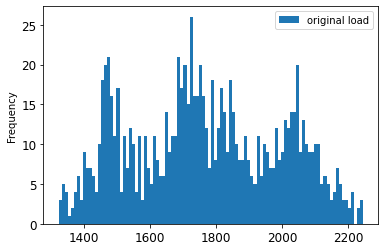

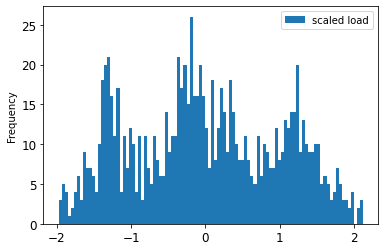

In [19]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499,-0.979125
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351,-1.126049
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460,-1.085979
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775,-1.148311
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090,-1.166120
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736,-1.170572
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990,-1.192833
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910,-1.272973
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978,-1.277426


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499,-0.979125
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351,-1.126049
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460,-1.085979
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775,-1.148311
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090,-1.166120
7206,-1.175024,0.163035,0.662866,-1.513750,1.441195,-1.22847,-0.817837,-0.284769,-0.014335,-1.100190,-1.023682,-1.109438,-0.644736,-1.170572
7207,-1.232903,0.103718,0.722570,-1.513750,1.441195,-1.22847,-0.898096,-0.440919,-0.076802,-1.135467,-1.090018,-1.087152,-0.746990,-1.192833
7208,-1.255164,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.902555,-0.597070,-0.166041,-1.228068,-1.182889,-1.154010,-0.843368,-1.255164
7209,-1.308591,0.103718,0.722570,-1.369419,1.441195,-1.22847,-0.991733,-0.686299,-0.308822,-1.250116,-1.182889,-1.185210,-0.931910,-1.272973
7210,-1.326400,0.073400,0.912626,-1.369419,1.441195,-1.22847,-1.179005,-0.820142,-0.286512,-1.232477,-1.205001,-1.211953,-1.023978,-1.277426


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8052,-0.569519,-0.070279,0.212333,1.372873,-1.256834,-1.22847,-0.296148,0.103377,0.489862,0.024248,-0.254179,0.156411,-0.122103,-0.360263
8053,-0.676373,-0.070279,0.212333,1.372873,-1.256834,-1.22847,-0.434374,-0.008159,0.414009,-0.090401,-0.395697,-0.017421,-0.218480,-0.293480
8054,-0.765418,-0.252185,0.462371,1.372873,-1.256834,-1.22847,-0.425456,-0.186617,0.405085,-0.178592,-0.404542,-0.066450,-0.321910,-0.355811
8055,-0.876724,-0.434091,0.712409,1.372873,-1.256834,-1.22847,-0.492339,-0.217847,0.311385,-0.262374,-0.519525,-0.133308,-0.426907,-0.471570
8056,-0.992482,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.572599,-0.298153,0.101675,-0.363794,-0.683155,-0.267025,-0.523676,-0.573971
8057,-1.041457,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.679612,-0.436458,-0.009873,-0.584272,-0.665465,-0.338340,-0.614960,-0.671920
8058,-0.992482,-0.501318,0.771187,1.517204,-1.256834,-1.22847,-0.768789,-0.427535,-0.188350,-0.438756,-0.603551,-0.324968,-0.686264,-0.809940
8059,-1.032552,-0.568544,0.829964,1.517204,-1.256834,-1.22847,-0.880261,-0.494457,-0.219584,-0.438756,-0.683155,-0.382912,-0.758352,-0.872271
8060,-1.050361,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-0.996191,-0.574763,-0.299898,-0.553405,-0.731801,-0.485428,-0.824954,-1.001386
8061,-1.130502,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-1.045239,-0.681837,-0.438218,-0.676872,-0.829095,-0.636973,-0.886463,-1.068170


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7201,-0.979125
7202,-1.126049
7203,-1.085979
7204,-1.148311
7205,-1.166120
...,...
8057,-0.671920
8058,-0.809940
8059,-0.872271
8060,-1.001386


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.680825,0.409530,0.426029,-1.658081,1.441195,-1.22847,-0.305066,-0.079542,0.208761,-0.720968,-0.811405,-0.770690,-0.198499
7202,-0.814392,0.315941,0.514595,-1.658081,1.441195,-1.22847,-0.282772,-0.012621,0.235532,-0.791521,-0.820250,-0.775147,-0.291351
7203,-0.894533,0.222352,0.603162,-1.658081,1.441195,-1.22847,-0.438832,-0.075081,0.123984,-0.848845,-0.820250,-0.944521,-0.381460
7204,-0.898985,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.594893,-0.164310,0.007974,-0.972313,-0.860052,-0.944521,-0.461775
7205,-0.988030,0.222352,0.603162,-1.513750,1.441195,-1.22847,-0.684070,-0.307076,-0.081264,-1.020818,-0.935233,-1.038122,-0.542090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-1.041457,-0.434091,0.712409,1.517204,-1.256834,-1.22847,-0.679612,-0.436458,-0.009873,-0.584272,-0.665465,-0.338340,-0.614960
8058,-0.992482,-0.501318,0.771187,1.517204,-1.256834,-1.22847,-0.768789,-0.427535,-0.188350,-0.438756,-0.603551,-0.324968,-0.686264
8059,-1.032552,-0.568544,0.829964,1.517204,-1.256834,-1.22847,-0.880261,-0.494457,-0.219584,-0.438756,-0.683155,-0.382912,-0.758352
8060,-1.050361,-0.568544,0.829964,1.661535,-1.256834,-1.22847,-0.996191,-0.574763,-0.299898,-0.553405,-0.731801,-0.485428,-0.824954


In [26]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 0s 15ms/step - loss: 1.2659 - val_loss: 1.2601
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 1.2460 - val_loss: 1.2403
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 1.2272 - val_loss: 1.2216
Epoch 4/300
15/15 [==============================] - 0s 4ms/step - loss: 1.2095 - val_loss: 1.2040
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 1.1929 - val_loss: 1.1875
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 1.1776 - val_loss: 1.1723
Epoch 7/300
15/15 [==============================] - 0s 4ms/step - loss: 1.1634 - val_loss: 1.1583
Epoch 8/300
15/15 [==============================] - 0s 4ms/step - loss: 1.1504 - val_loss: 1.1453
Epoch 9/300
15/15 [==============================] - 0s 4ms/step - loss: 1.1384 - val_loss: 1.1334
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 1.1275 - val_loss: 1.1225
Epoch 11

Epoch 83/300
15/15 [==============================] - 0s 4ms/step - loss: 0.9646 - val_loss: 0.9524
Epoch 84/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9636 - val_loss: 0.9512
Epoch 85/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9626 - val_loss: 0.9500
Epoch 86/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9615 - val_loss: 0.9487
Epoch 87/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9603 - val_loss: 0.9474
Epoch 88/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9592 - val_loss: 0.9460
Epoch 89/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9580 - val_loss: 0.9447
Epoch 90/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9568 - val_loss: 0.9432
Epoch 91/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9556 - val_loss: 0.9418
Epoch 92/300
15/15 [==============================] - 0s 3ms/step - loss: 0.9543 - val_loss: 0.9403


15/15 [==============================] - 0s 3ms/step - loss: 0.7871 - val_loss: 0.7379
Epoch 246/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7868 - val_loss: 0.7374
Epoch 247/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7864 - val_loss: 0.7369
Epoch 248/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7860 - val_loss: 0.7365
Epoch 249/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7856 - val_loss: 0.7360
Epoch 250/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7853 - val_loss: 0.7356
Epoch 251/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7849 - val_loss: 0.7351
Epoch 252/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7845 - val_loss: 0.7347
Epoch 253/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7842 - val_loss: 0.7342
Epoch 254/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7839 - val_loss: 0.7338
Epoc

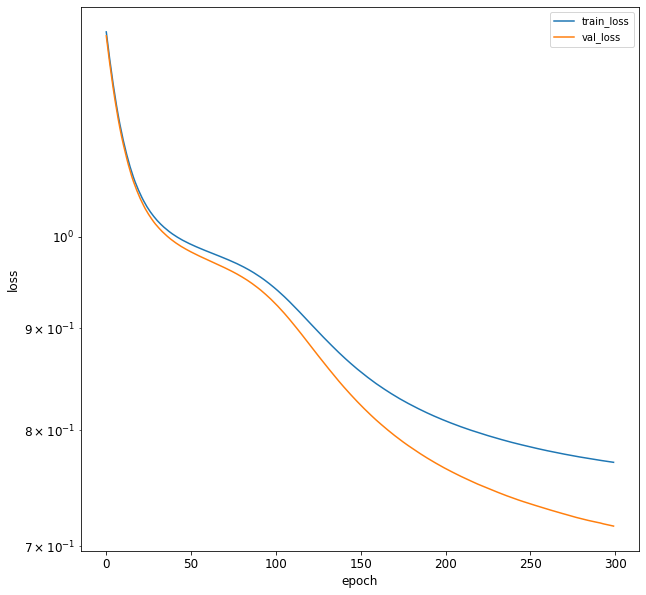

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,1517.0,15.227452,82.212390,1.0,3.0,1.0,1586.0,1688.0,1744.0,1404.0,1541.0,1520.0,1620.416667
8163,1505.0,15.102452,82.980680,1.0,3.0,1.0,1572.0,1662.0,1704.0,1403.0,1525.0,1501.0,1603.833333
8164,1490.0,15.102452,82.980680,2.0,3.0,1.0,1543.0,1639.0,1687.0,1347.0,1522.0,1500.0,1587.416667
8165,1462.0,15.102452,82.980680,2.0,3.0,1.0,1528.0,1617.0,1702.0,1370.0,1497.0,1482.0,1567.416667
8166,1458.0,15.172452,83.207925,2.0,3.0,1.0,1517.0,1586.0,1688.0,1361.0,1478.0,1473.0,1548.250000
8167,1455.0,15.242452,83.435170,2.0,3.0,1.0,1505.0,1572.0,1662.0,1356.0,1474.0,1459.0,1531.000000
8168,1455.0,15.242452,83.435170,3.0,3.0,1.0,1490.0,1543.0,1639.0,1343.0,1467.0,1450.0,1515.666667
8169,1441.0,15.242452,83.435170,3.0,3.0,1.0,1462.0,1528.0,1617.0,1340.0,1446.0,1418.0,1501.000000
8170,1442.0,14.857452,86.310845,3.0,3.0,1.0,1458.0,1517.0,1586.0,1335.0,1420.0,1428.0,1489.000000
8171,1429.0,14.472452,89.186520,3.0,3.0,1.0,1455.0,1505.0,1572.0,1331.0,1422.0,1419.0,1477.083333


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


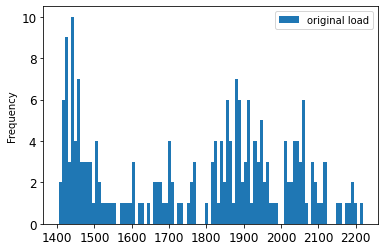

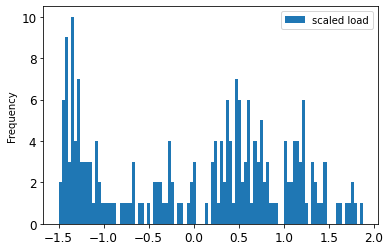

In [33]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,-0.581660,-0.721890,-0.663175,-1.259047
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,-0.660779,-0.805196,-0.736720,-1.263190
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,-0.675614,-0.809581,-0.809527,-1.308762
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,-0.799237,-0.888503,-0.898226,-1.329476
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,-0.893191,-0.927964,-0.983228,-1.337762
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,-0.912971,-0.989347,-1.059731,-1.325333
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,-0.947585,-1.028808,-1.127733,-1.354333
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,-1.051429,-1.169114,-1.192779,-1.420620
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,-1.179997,-1.125268,-1.245998,-1.354333
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,-1.170107,-1.164729,-1.298847,-1.416477


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,-0.581660,-0.721890,-0.663175,-1.259047
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,-0.660779,-0.805196,-0.736720,-1.263190
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,-0.675614,-0.809581,-0.809527,-1.308762
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,-0.799237,-0.888503,-0.898226,-1.329476
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,-0.893191,-0.927964,-0.983228,-1.337762
8167,-1.288047,-0.838255,0.360925,-1.357685,-1.004934,0.340279,-1.097753,-0.852441,-0.502981,-1.551696,-0.912971,-0.989347,-1.059731,-1.325333
8168,-1.288047,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.160418,-0.975893,-0.602979,-1.604324,-0.947585,-1.028808,-1.127733,-1.354333
8169,-1.346048,-0.838255,0.360925,-1.217006,-1.004934,0.340279,-1.277394,-1.039748,-0.698629,-1.616468,-1.051429,-1.169114,-1.192779,-1.420620
8170,-1.341905,-0.983438,0.552298,-1.217006,-1.004934,0.340279,-1.294105,-1.086575,-0.833408,-1.636710,-1.179997,-1.125268,-1.245998,-1.354333
8171,-1.395762,-1.128622,0.743671,-1.217006,-1.004934,0.340279,-1.306638,-1.137658,-0.894276,-1.652903,-1.170107,-1.164729,-1.298847,-1.416477


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8269,-1.420620,-1.155019,1.285274,-1.076327,0.516823,0.340279,-1.348415,-1.265368,-1.094271,-1.264268,-1.585482,-1.186652,-1.364632,-1.424763
8270,-1.354333,-1.138049,1.283239,-1.076327,0.516823,0.340279,-1.356771,-1.320709,-1.168182,-1.252123,-1.590427,-1.226113,-1.390502,-1.441334
8271,-1.416477,-1.121080,1.281204,-1.076327,0.516823,0.340279,-1.344238,-1.324966,-1.189920,-1.268316,-1.654711,-1.256805,-1.420068,-1.300476
8272,-1.404048,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.373482,-1.371792,-1.250788,-1.292606,-1.654711,-1.226113,-1.443352,-1.230047
8273,-1.408191,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.440325,-1.393077,-1.316004,-1.320944,-1.580537,-1.199806,-1.461461,-1.118189


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8162,-1.259047
8163,-1.263190
8164,-1.308762
8165,-1.329476
8166,-1.337762
...,...
8269,-1.424763
8270,-1.441334
8271,-1.300476
8272,-1.230047


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,-1.031188,-0.843912,0.279551,-1.498364,-1.004934,0.340279,-0.759358,-0.358631,-0.146469,-1.357378,-0.581660,-0.721890,-0.663175
8163,-1.080903,-0.891049,0.330679,-1.498364,-1.004934,0.340279,-0.817846,-0.469312,-0.320377,-1.361427,-0.660779,-0.805196,-0.736720
8164,-1.143046,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-0.939000,-0.567223,-0.394289,-1.588130,-0.675614,-0.809581,-0.809527
8165,-1.259047,-0.891049,0.330679,-1.357685,-1.004934,0.340279,-1.001665,-0.660876,-0.329073,-1.495020,-0.799237,-0.888503,-0.898226
8166,-1.275619,-0.864652,0.345802,-1.357685,-1.004934,0.340279,-1.047620,-0.792843,-0.389941,-1.531455,-0.893191,-0.927964,-0.983228
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.420620,-1.155019,1.285274,-1.076327,0.516823,0.340279,-1.348415,-1.265368,-1.094271,-1.264268,-1.585482,-1.186652,-1.364632
8270,-1.354333,-1.138049,1.283239,-1.076327,0.516823,0.340279,-1.356771,-1.320709,-1.168182,-1.252123,-1.590427,-1.226113,-1.390502
8271,-1.416477,-1.121080,1.281204,-1.076327,0.516823,0.340279,-1.344238,-1.324966,-1.189920,-1.268316,-1.654711,-1.256805,-1.420068
8272,-1.404048,-1.121080,1.281204,-0.935648,0.516823,0.340279,-1.373482,-1.371792,-1.250788,-1.292606,-1.654711,-1.226113,-1.443352


In [39]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.18001031875610352s


In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1765.90566
dtype: float64
Cons    241.948842
dtype: float64


In [41]:
load_mean=1765.90566
load_std=241.948842
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


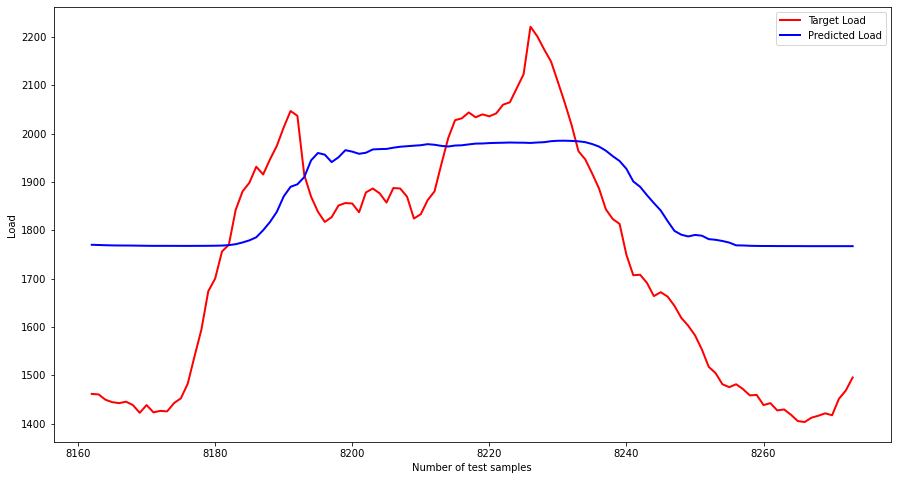

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

11.527766701619925


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -8.775925
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8162  146006.954230
8163  145906.663138
8164  144803.168889
8165  144301.588960
8166  144100.957710
...             ...
8269  141994.268257
8270  141592.968980
8271  145003.945556
8272  146709.382108
8273  149417.950168

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8162   95205.659369
8163   95565.656661
8164  102215.256419
8165  105191.200099
8166  106379.487220
...             ...
8269  119597.692933
8270  122394.550549
8271   99699.252417
8272   89230.106933
8273   73798.199463

[112 rows x 1 columns]
y_t+100    45323.439167
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    212.893023
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1769.8348]
[1769.4153]
[1768.9635]
[1768.5724]
[1768.3944]
[1768.3146]
[1768.2131]
[1767.9817]
[1767.7921]
[1767.6472]
[1767.6511]
[1767.6467]
[1767.62]
[1767.557]
[1767.5321]
[1767.6213]
[1767.6707]
[1767.7363]
[1767.9066]
[1768.2245]
[1769.1088]
[1771.0804]
[1774.6589]
[1779.0245]
[1785.3768]
[1799.8876]
[1817.0151]
[1838.0297]
[1869.8712]
[1889.7545]
[1894.9738]
[1909.8744]
[1944.636]
[1959.7887]
[1956.2692]
[1940.9392]
[1950.9197]
[1965.5498]
[1962.603]
[1958.0953]
[1960.3024]
[1967.1273]
[1967.8118]
[1968.1837]
[1970.713]
[1972.6941]
[1973.7972]
[1974.8733]
[1975.8577]
[1978.0286]
[1976.7898]
[1974.4752]
[1973.182]
[1975.2277]
[1975.7257]
[1977.556]
[1979.1908]
[1979.4122]
[1980.2769]
[1980.6941]
[1980.9904]
[1981.4285]
[1981.1456]
[1981.0454]
[1980.5337]
[1981.4812]
[1982.1062]
[1984.1831]
[1985.0646]
[1985.1986]
[1984.7352]
[1983.9337]
[1982.1396]
[1978.2733]
[1973.0111]
[1964.5413]
[1953.2196]
[1943.1454]
[1926.938]
[1900.888]
[1889.763]
[1872.3695]
[1856.1881]
[1840.836]
[181